# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# !pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | loei
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | quatre cocos
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | cabra
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | chapais
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | coahuayana
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | santiago
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | umm lajj
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | takoradi
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | trinidad
Processing 

Processing Record 36 of Set 4 | kloulklubed
Processing Record 37 of Set 4 | nouadhibou
Processing Record 38 of Set 4 | diebougou
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | coffs harbour
Processing Record 41 of Set 4 | pilar
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | san rafael
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | varadero
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | korla
Processing Record 48 of Set 4 | gasa
Processing Record 49 of Set 4 | aitape
Processing Record 0 of Set 5 | cabo san lucas
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | pawayan
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | serabu
Processing Record 5 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | makakilo city
Processing Record 8 of Set 5 | villazon
Processing Record 9

Processing Record 23 of Set 8 | siparia
Processing Record 24 of Set 8 | birao
Processing Record 25 of Set 8 | bowen
Processing Record 26 of Set 8 | sayat
Processing Record 27 of Set 8 | ocampo
Processing Record 28 of Set 8 | bobo dioulasso
Processing Record 29 of Set 8 | saskylakh
Processing Record 30 of Set 8 | sterling
Processing Record 31 of Set 8 | borogontsy
Processing Record 32 of Set 8 | arlit
Processing Record 33 of Set 8 | gulbene
Processing Record 34 of Set 8 | colina
Processing Record 35 of Set 8 | vryburg
Processing Record 36 of Set 8 | ladnun
Processing Record 37 of Set 8 | cherskiy
Processing Record 38 of Set 8 | izhma
Processing Record 39 of Set 8 | grand centre
City not found. Skipping...
Processing Record 40 of Set 8 | tual
Processing Record 41 of Set 8 | sorong
Processing Record 42 of Set 8 | osakarovka
Processing Record 43 of Set 8 | haines junction
Processing Record 44 of Set 8 | taber
Processing Record 45 of Set 8 | lagoa
Processing Record 46 of Set 8 | kamenskoye


Processing Record 12 of Set 12 | tomatlan
Processing Record 13 of Set 12 | manicore
Processing Record 14 of Set 12 | the valley
Processing Record 15 of Set 12 | inverell
Processing Record 16 of Set 12 | domoni
Processing Record 17 of Set 12 | soyo
Processing Record 18 of Set 12 | parainen
Processing Record 19 of Set 12 | ozgon
City not found. Skipping...
Processing Record 20 of Set 12 | utica
Processing Record 21 of Set 12 | matara
Processing Record 22 of Set 12 | aktas
Processing Record 23 of Set 12 | sinop
Processing Record 24 of Set 12 | cudahy
Processing Record 25 of Set 12 | kudahuvadhoo
Processing Record 26 of Set 12 | luganville
Processing Record 27 of Set 12 | sabang
Processing Record 28 of Set 12 | sisimiut
Processing Record 29 of Set 12 | vokhma
Processing Record 30 of Set 12 | araguaina
Processing Record 31 of Set 12 | ambulu
Processing Record 32 of Set 12 | aykhal
Processing Record 33 of Set 12 | cap-aux-meules
Processing Record 34 of Set 12 | boda
Processing Record 35 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,loei,17.4167,101.5000,17.84,54,56,2.26,TH,1672374057
1,quatre cocos,-20.2078,57.7625,27.83,69,20,2.42,MU,1672374057
2,lompoc,34.6391,-120.4579,13.40,88,100,2.06,US,1672374058
3,ushuaia,-54.8000,-68.3000,5.81,81,75,12.35,AR,1672373777
4,cabra,37.4725,-4.4421,9.24,77,46,1.62,ES,1672374058


In [7]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,loei,17.4167,101.5000,17.84,54,56,2.26,TH,2022-12-30
1,quatre cocos,-20.2078,57.7625,27.83,69,20,2.42,MU,2022-12-30
2,lompoc,34.6391,-120.4579,13.40,88,100,2.06,US,2022-12-30
3,ushuaia,-54.8000,-68.3000,5.81,81,75,12.35,AR,2022-12-30
4,cabra,37.4725,-4.4421,9.24,77,46,1.62,ES,2022-12-30


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loei,17.4167,101.5000,17.84,54,56,2.26,TH,2022-12-30
1,quatre cocos,-20.2078,57.7625,27.83,69,20,2.42,MU,2022-12-30
2,lompoc,34.6391,-120.4579,13.40,88,100,2.06,US,2022-12-30
3,ushuaia,-54.8000,-68.3000,5.81,81,75,12.35,AR,2022-12-30
4,cabra,37.4725,-4.4421,9.24,77,46,1.62,ES,2022-12-30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

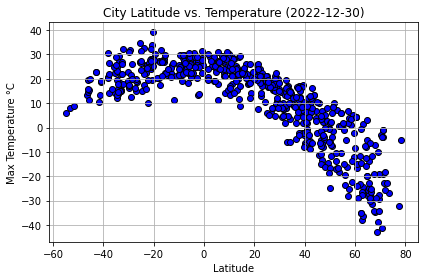

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

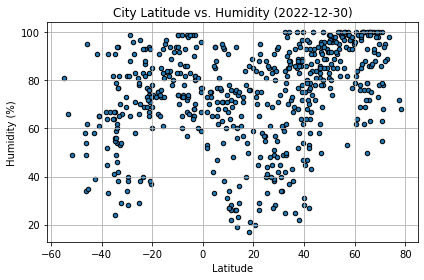

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

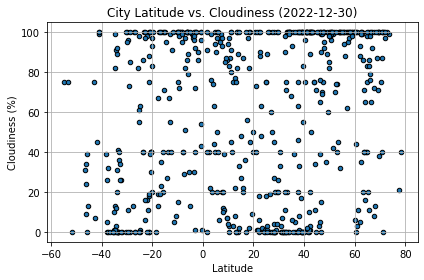

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

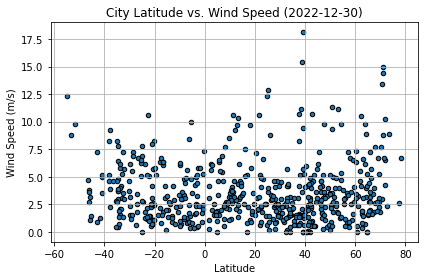

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loei,17.4167,101.5000,17.84,54,56,2.26,TH,2022-12-30
2,lompoc,34.6391,-120.4579,13.40,88,100,2.06,US,2022-12-30
4,cabra,37.4725,-4.4421,9.24,77,46,1.62,ES,2022-12-30
5,hilo,19.7297,-155.0900,22.92,85,40,2.57,US,2022-12-30
7,chapais,49.7834,-74.8492,-0.12,99,100,3.47,CA,2022-12-30


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,quatre cocos,-20.2078,57.7625,27.83,69,20,2.42,MU,2022-12-30
3,ushuaia,-54.8000,-68.3000,5.81,81,75,12.35,AR,2022-12-30
6,port alfred,-33.5906,26.8910,15.10,94,41,1.51,ZA,2022-12-30
8,puerto ayora,-0.7393,-90.3518,22.53,96,43,2.47,EC,2022-12-30
11,punta arenas,-53.1500,-70.9167,8.06,66,75,8.75,CL,2022-12-30


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.74x + 32.84
The r-value is: -0.8604320589216035


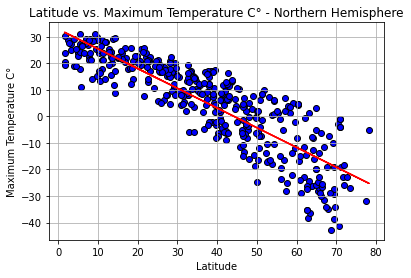

In [17]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.21x + 27.36
The r-value is: 0.4712695547121308


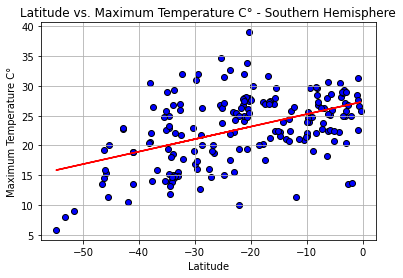

In [18]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.5x + 55.05
The r-value is: 0.46543037824128664


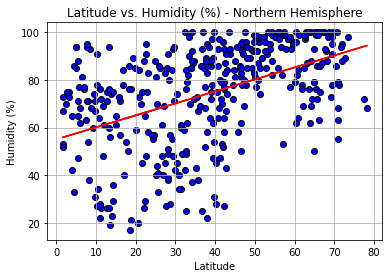

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.56x + 84.17
The r-value is: 0.4238744502833396


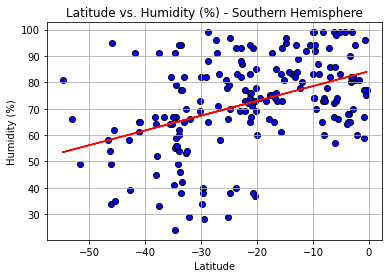

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and humidity based on the data available. The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.51x + 41.5
The r-value is: 0.24707180931832481


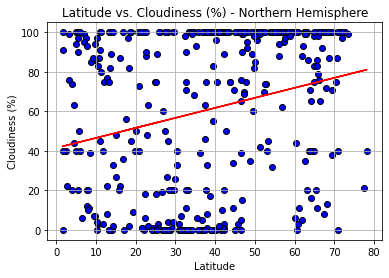

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 1.26x + 81.13
The r-value is: 0.41500253897787653


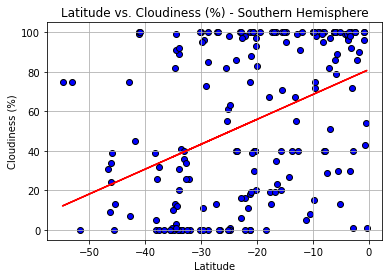

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and cloudiness based on the data available. The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no bearing on cloudiness. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 2.94
The r-value is: 0.09558101811287424


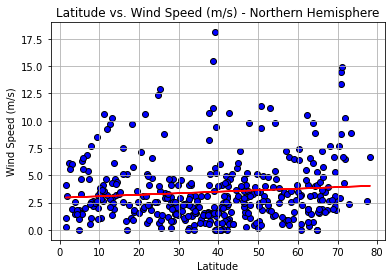

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.04x + 2.57
The r-value is: -0.2344775187706622


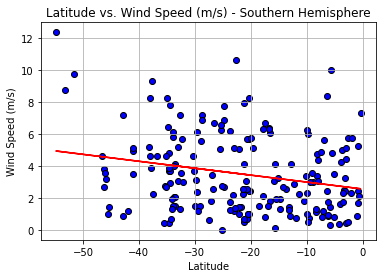

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.